# Predicting Droughts with Meteorological Data


In [2]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm.auto import tqdm
from datetime import datetime
from scipy.interpolate import interp1d
from sklearn.preprocessing import RobustScaler

from projectUtils import *


## Load our saved Data
We can index to get submatrices for less previous observations

In [3]:
def np_load(filename):
    path = ''
    return np.load(path + filename + '.npy', allow_pickle=True)

X_test = np_load('X_test14wvar')
y_test = np_load('y_test14wvar')


In [4]:
# convert to multiclass
y_test = round_and_intify(y_test)


In [5]:
y_test.dtype

dtype('int32')

## load and evaluate saved model runs

In [6]:
files = []

for dirname, _, filenames in os.walk('./results'):
    for filename in filenames:
        if 'pkl' in filename:
            files.append(os.path.join(dirname, filename))

            
print(files)

['./results/elastic2.pkl', './results/default-params-500itr.pkl', './results/lbgfs-C.pkl', './results/default-params-1000itr.pkl', './results/lbgfs-none.pkl', './results/default-params-100itr.pkl', './results/saga-search.pkl', './results/default-params-250itr.pkl', './results/lbgfs-Cs.pkl', './results/saga-search-copy.pkl']


./results/elastic2.pkl
{'estimator__base_estimator__l1_ratio': 0.5, 'estimator__base_estimator__penalty': 'elasticnet'}


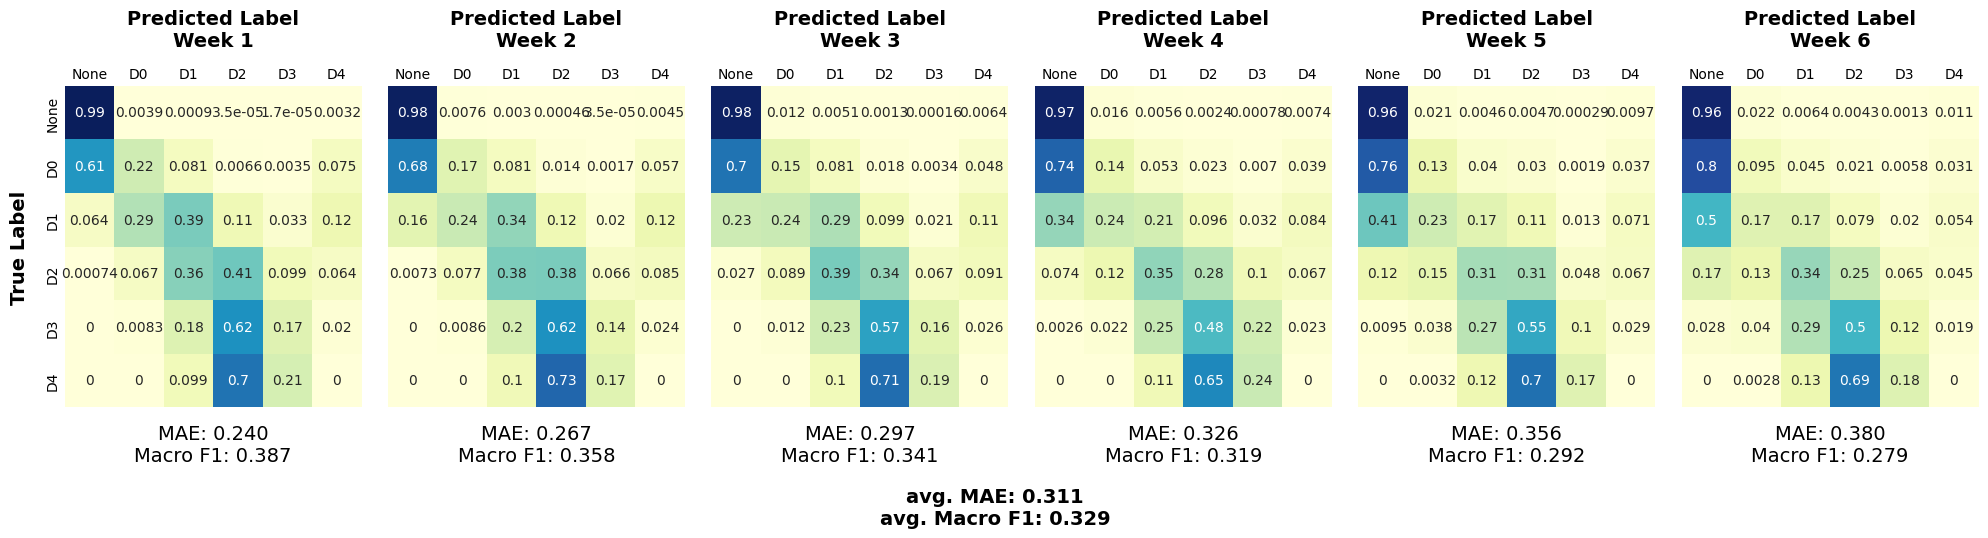

./results/default-params-500itr.pkl


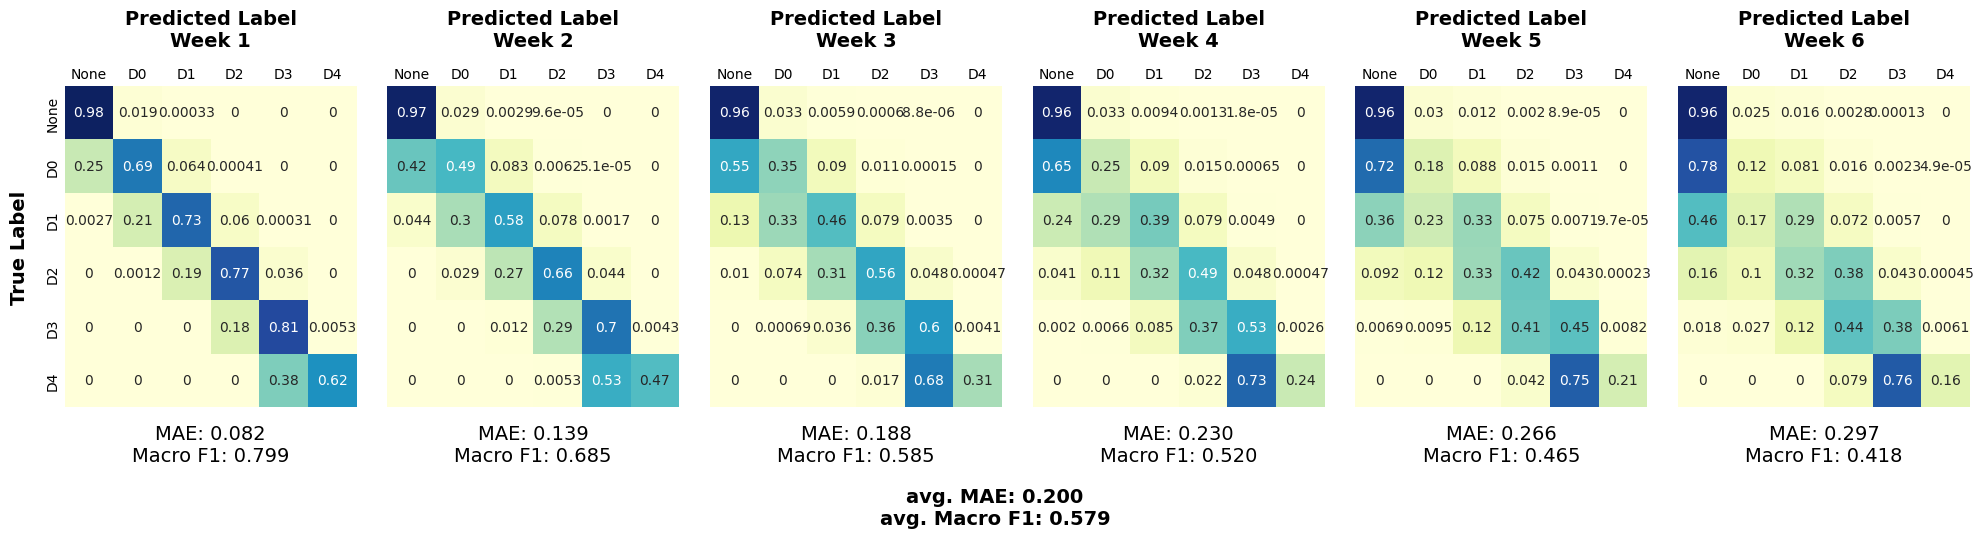

./results/lbgfs-C.pkl
{'estimator__base_estimator__C': 1.0, 'estimator__base_estimator__penalty': 'l2'}


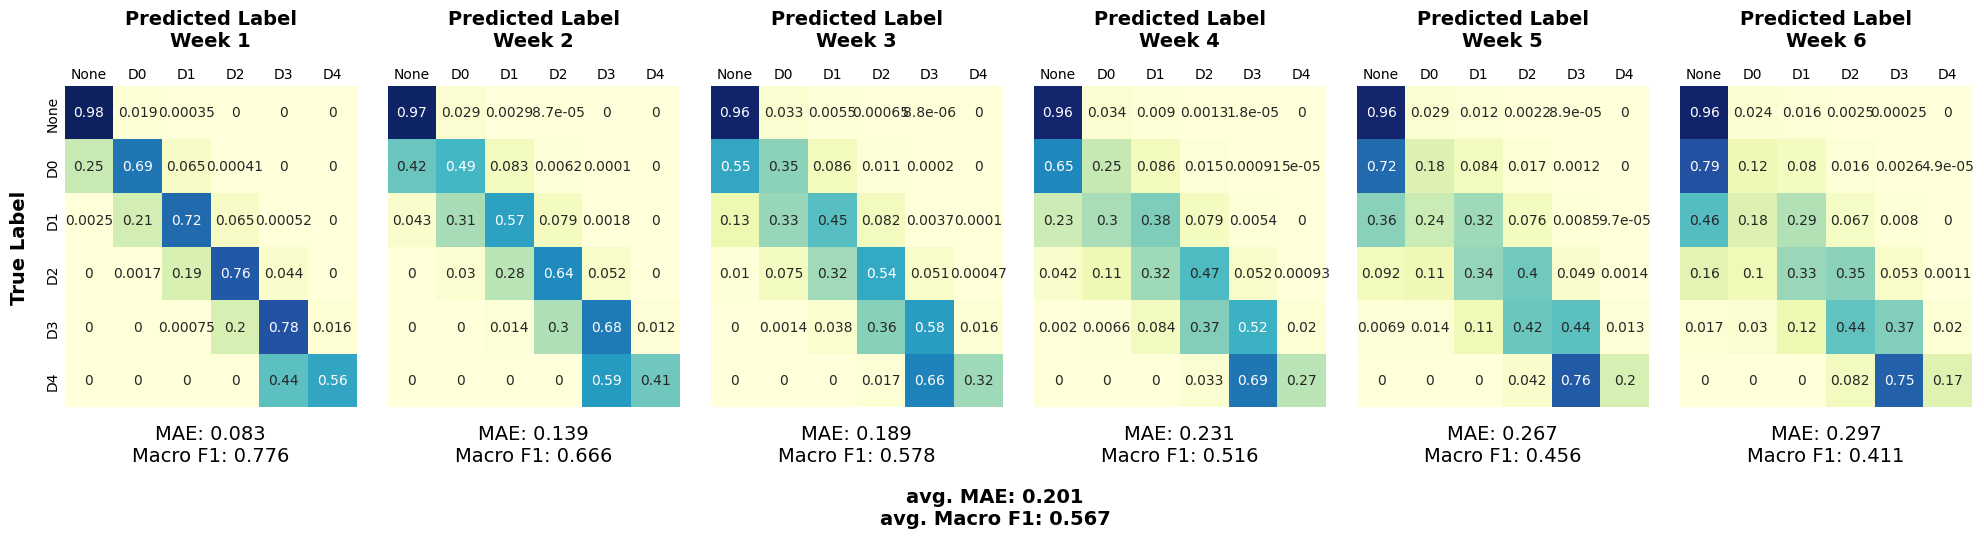

./results/default-params-1000itr.pkl


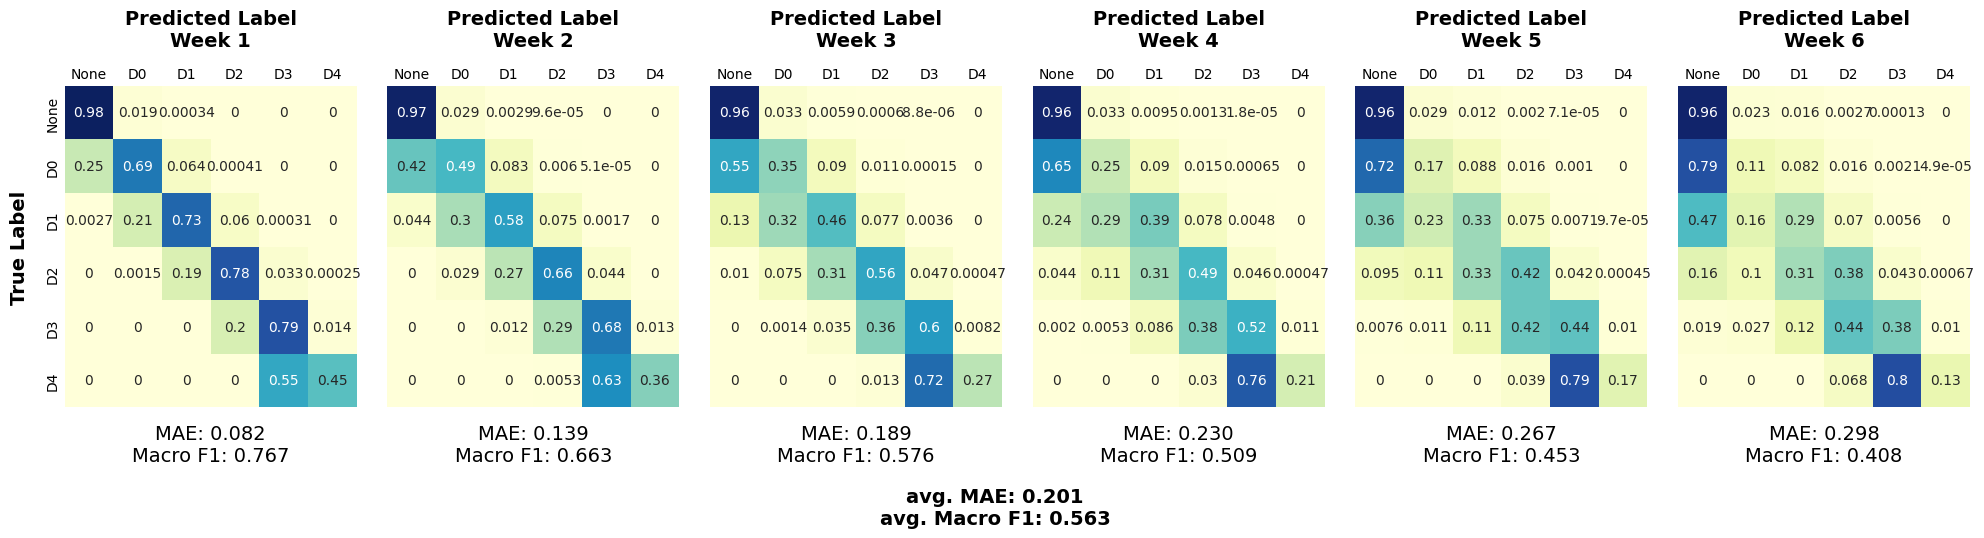

./results/lbgfs-none.pkl
{'estimator__base_estimator__C': 0.5, 'estimator__base_estimator__penalty': 'none'}


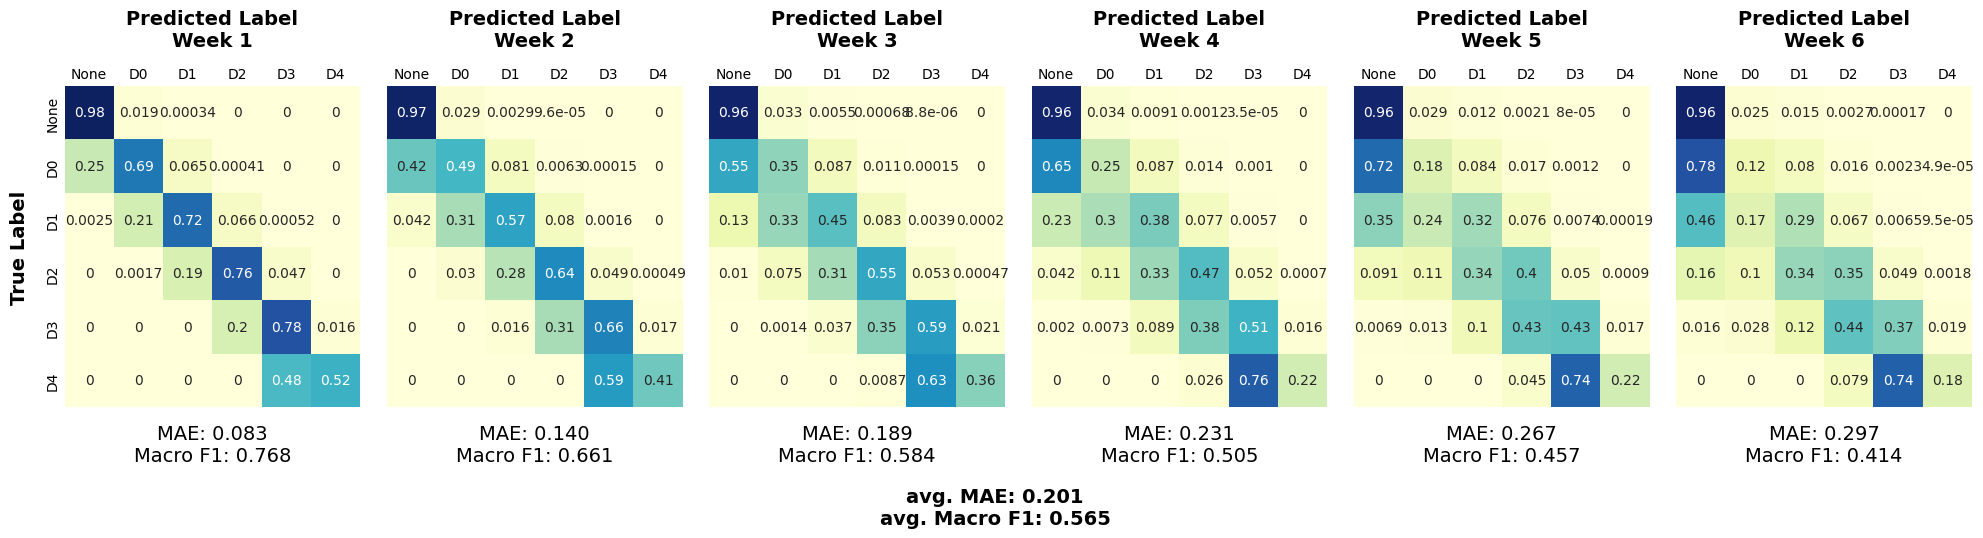

./results/default-params-100itr.pkl


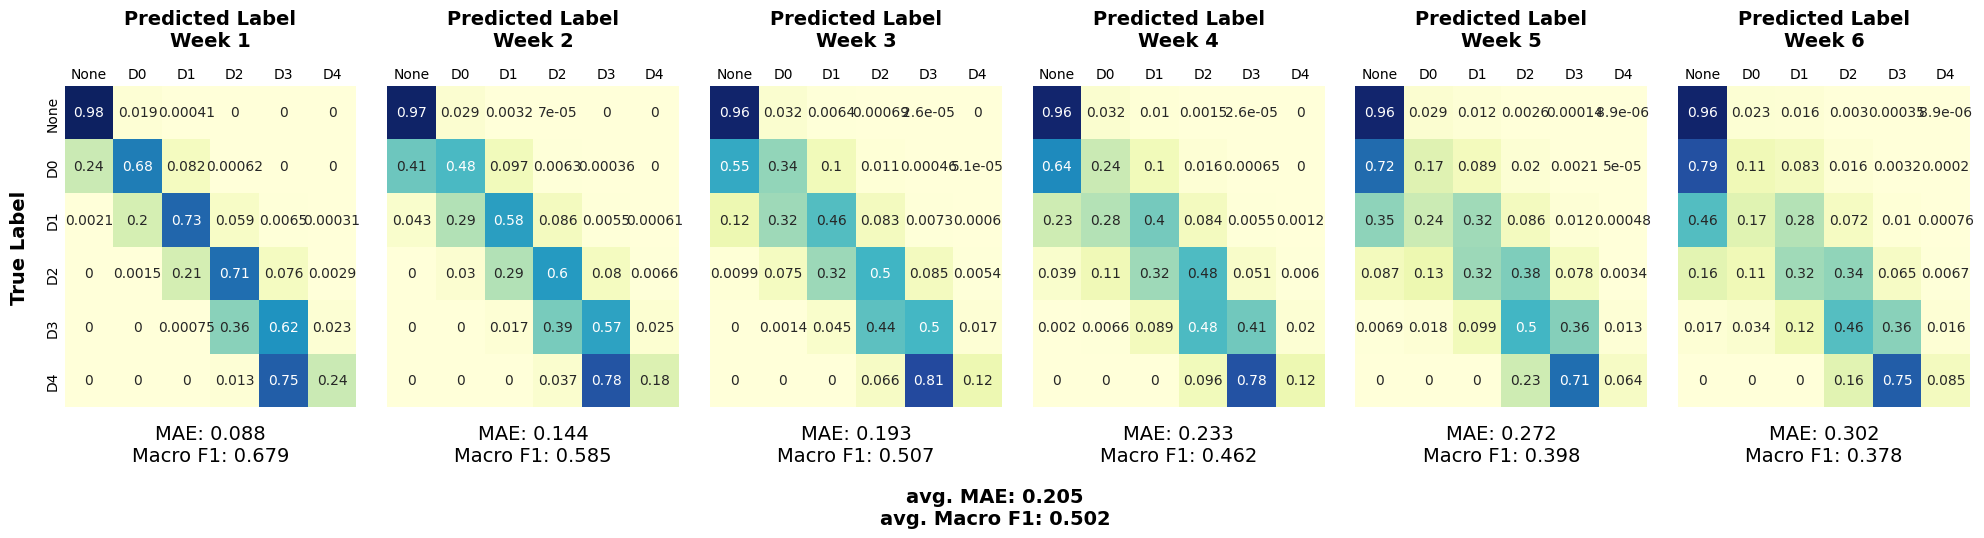

./results/saga-search.pkl
{'estimator__base_estimator__C': 0.01, 'estimator__base_estimator__l1_ratio': 1.0, 'estimator__base_estimator__penalty': 'elasticnet'}


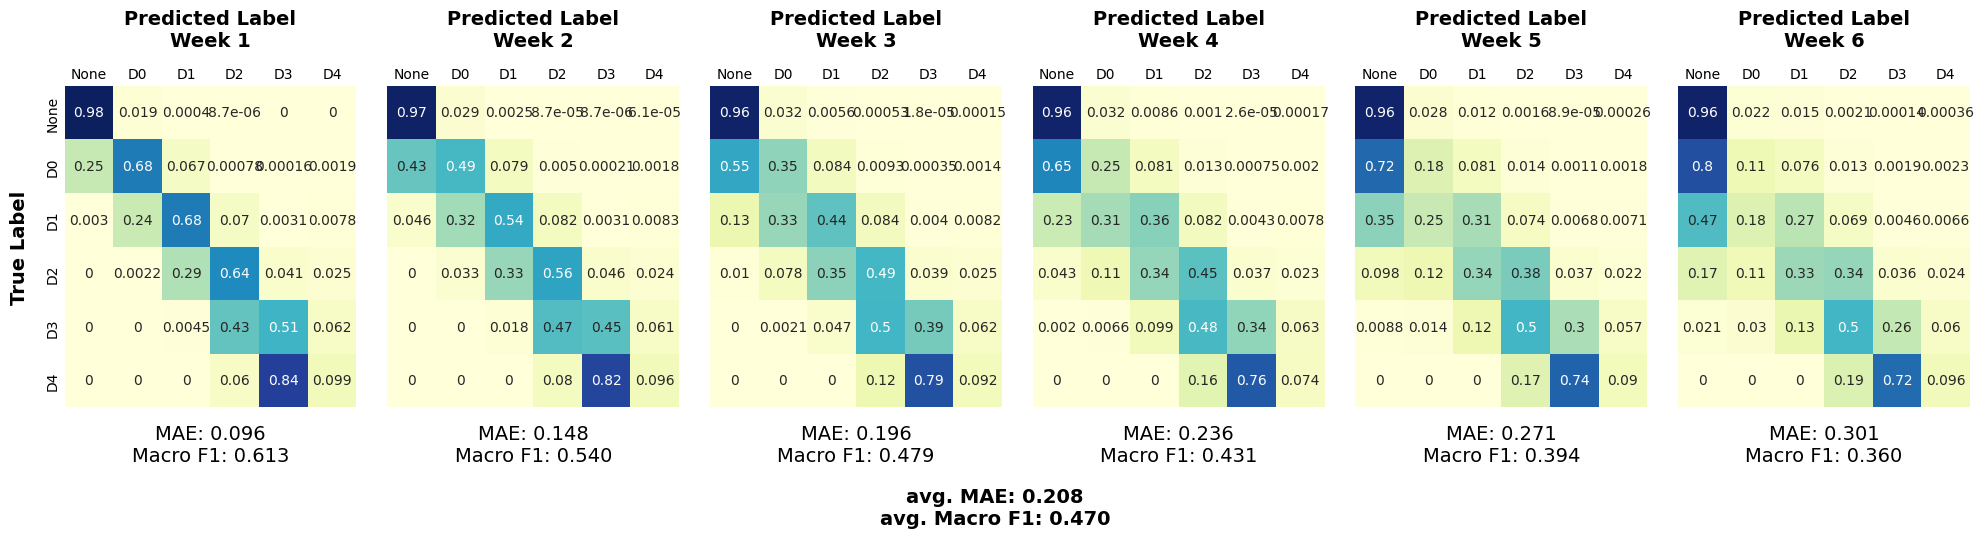

./results/default-params-250itr.pkl


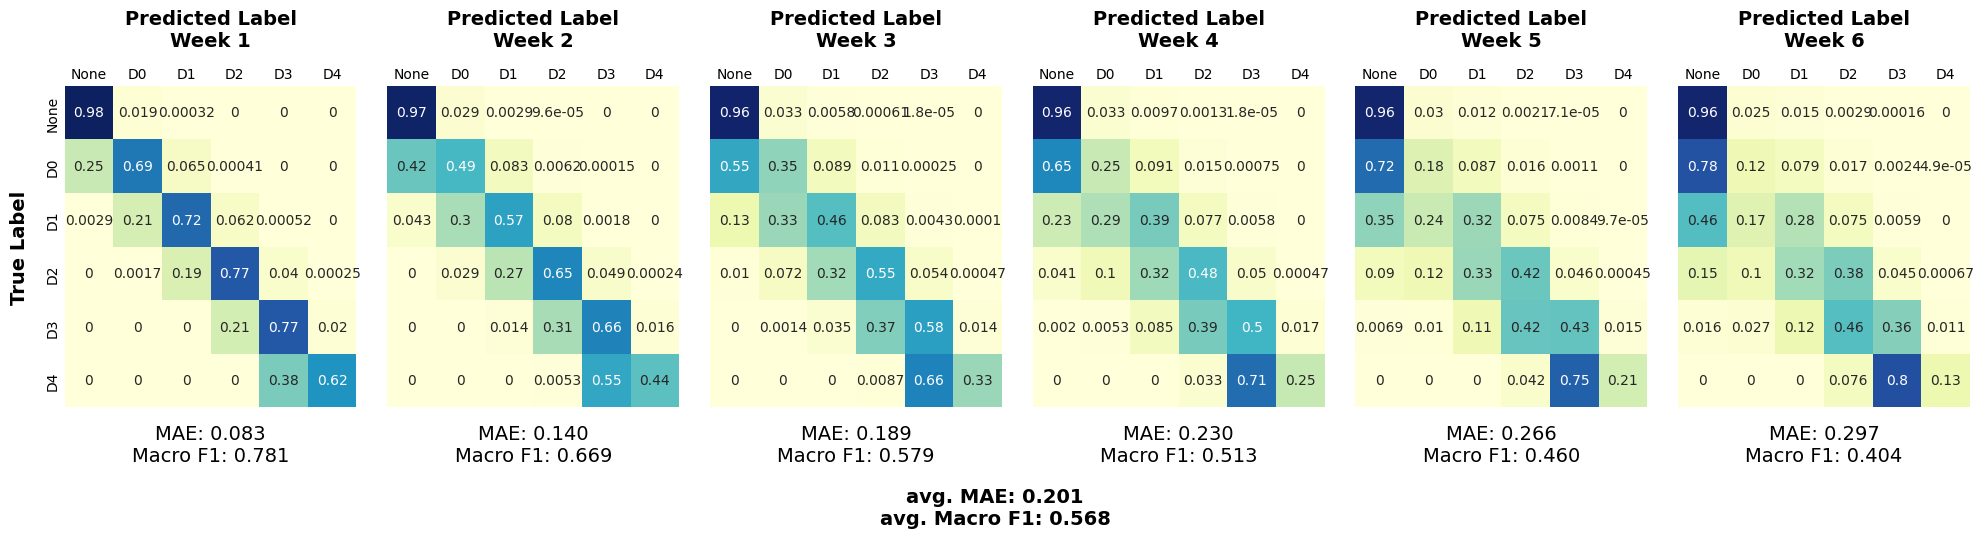

./results/lbgfs-Cs.pkl
{'estimator__base_estimator__C': 200, 'estimator__base_estimator__penalty': 'l2'}


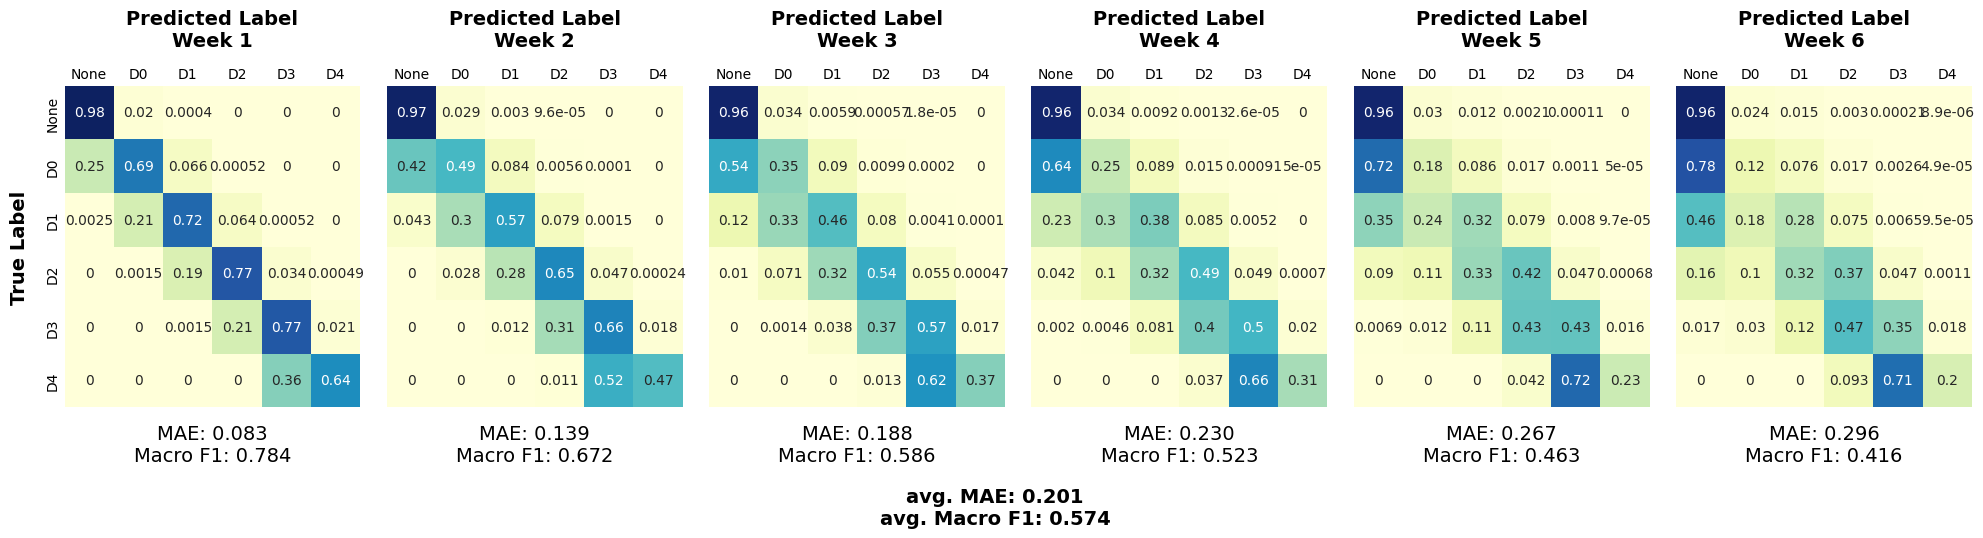

./results/saga-search-copy.pkl
{'estimator__base_estimator__C': 1.0, 'estimator__base_estimator__l1_ratio': 0.5, 'estimator__base_estimator__penalty': 'elasticnet'}


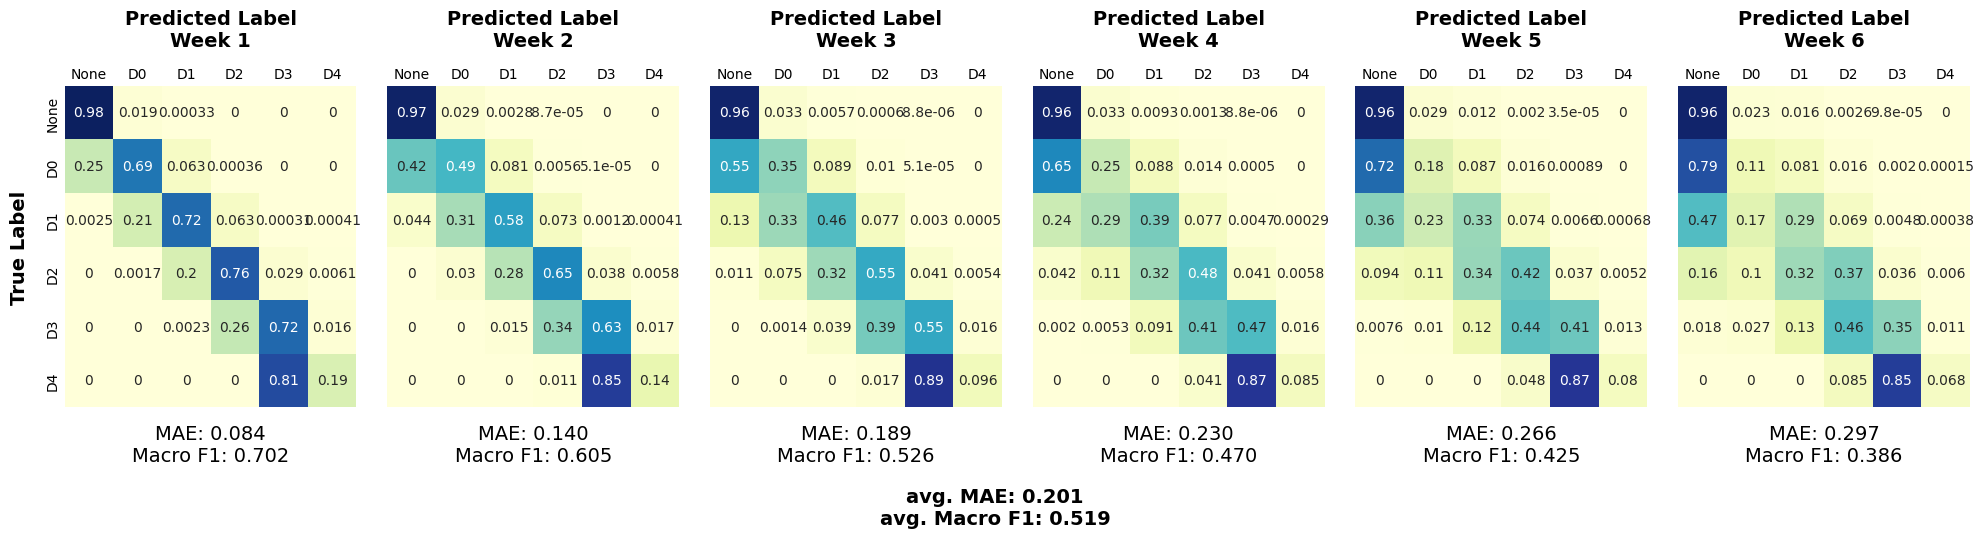

In [19]:
for fn in files:
    model = load_model(fn)
    
    print(fn)
    ./results/default-params-500itr.pkl

    if 'GridSearchCV' in str(type(model)):
        print(model.best_params_)
        
    summarize(y_test, model.predict(X_test))
    del model
    #

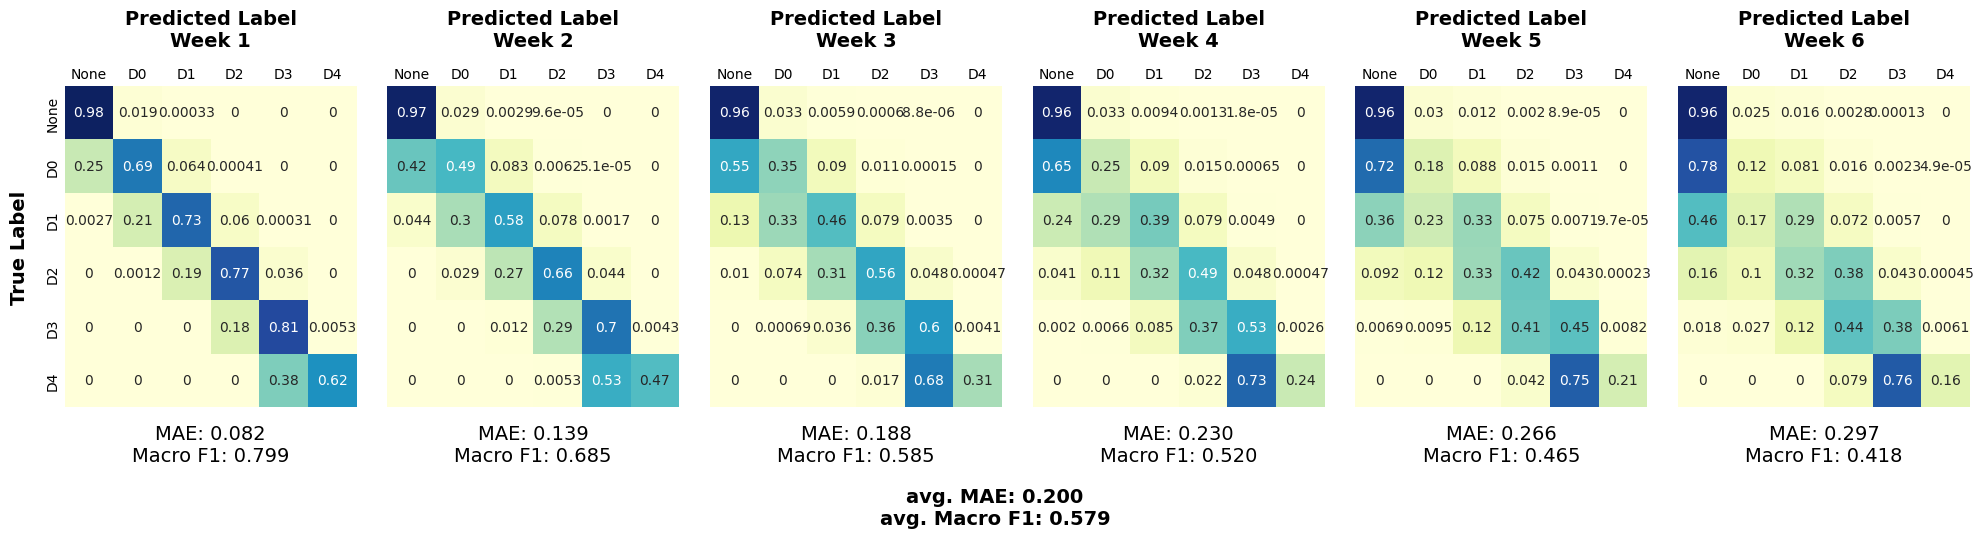

In [20]:
model = load_model('./results/default-params-500itr.pkl')

summarize(y_test, model.predict(X_test))